## Downloads

In [15]:
!pip install empatches

  Preparing metadata (setup.py) ... done
  Created wheel for empatches: filename=empatches-0.2.2-py3-none-any.whl size=8396 sha256=a3d49bb283937fcadff26a28bd5c08c75059a33f4e2b4f8096d2e883a58b5f59
  Stored in directory: /Users/abhimanyubhowmik/Library/Caches/pip/wheels/d9/82/ac/3883dcdb28ff109888b531bb8539105ca1b5fffed63f25a253
Successfully built empatches


In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.1 MB/s 


# Image Preprocessing

### Imports

In [1]:
import rasterio
import os
import cv2
import glob
import shutil
from rasterio.plot import show
from matplotlib import pyplot as plt
from patchify import patchify
import tifffile as tiff
from osgeo import gdal
import numpy as np

### Reading Tiff Image Files

In [2]:
path1 = 'k3_20191229071905_40634_06371169_l1g_nrg_smallchip.tif'
#path2 = '/content/drive/MyDrive/ISRO_Data/k3_20191229071905_40634_06371168_l1g_p.tif'

In [3]:
ds1 = gdal.Open(path1)
#ds2 = gdal.Open(path2)

In [4]:
# import 
gt1 = ds1.GetGeoTransform()
proj1 = ds1.GetProjection()

band1 = ds1.GetRasterBand(1)
array1 = band1.ReadAsArray()

band2 = ds1.GetRasterBand(2)
array1 = band2.ReadAsArray()

band3 = ds1.GetRasterBand(3)
array3 = band3.ReadAsArray()

In [6]:
gt2 = ds2.GetGeoTransform()
proj2 = ds2.GetProjection()
img_aray2 = ds2.ReadAsArray()

NameError: name 'ds2' is not defined

#### Transformation and Projection Informations

In [5]:
gt1

(635809.9893442297, 2.8, 0.0, 2496068.408324141, 0.0, -2.8)

In [ ]:
gt2

(635809.9893442297, 0.7, 0.0, 2496067.008324141, 0.0, -0.7)

In [6]:
proj1

'PROJCS["WGS 84 / UTM zone 45N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",87],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32645"]]'

In [ ]:
proj2

'PROJCS["WGS 84 / UTM zone 45N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",87],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32645"]]'

In [7]:
img1 = rasterio.open(path1)
#img2 = rasterio.open(path2)

In [8]:
full_img_1 = img1.read()
#full_img_2 = img2.read()

(37, 3, 128, 5049)

In [ ]:
# Geo Ref Information
!gdalinfo -nomd /content/drive/MyDrive/ISRO_Data/k3_20191229071905_40634_06371168_l1g_p.tif

Driver: GTiff/GeoTIFF
Files: /content/drive/MyDrive/ISRO_Data/k3_20191229071905_40634_06371168_l1g_p.tif
Size is 20193, 18720
Coordinate System is:
PROJCS["WGS 84 / UTM zone 45N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",87],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32645"]]
Origin = (635809.989344229688868,2496067.008324141148478)
Pixel Size = (0.70000000000

### Image Descriptions

In [ ]:
full_img_2[0].shape[0]

18720

In [ ]:
# No. Bands
count1 = img1.count
count2 = img2.count
print('Image 1 bands: {count1} Image 2 bands: {count2}'.format(count1 = count1, count2 = count2))

Image 1 bands: 3 Image 2 bands: 1


In [ ]:
img1.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 5049,
 'height': 4681,
 'count': 3,
 'crs': CRS.from_epsg(32645),
 'transform': Affine(2.8, 0.0, 635809.9893442297,
        0.0, -2.8, 2496068.408324141)}

In [ ]:
img2.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 20193,
 'height': 18720,
 'count': 1,
 'crs': CRS.from_epsg(32645),
 'transform': Affine(0.7, 0.0, 635809.9893442297,
        0.0, -0.7, 2496067.008324141)}

In [ ]:
new_img2 = ((full_img_2 - full_img_2.min()) * (1/(full_img_2.max() - full_img_2.min()) * 255))
new_img2 = new_img2.reshape(new_img2.shape[1],new_img2.shape[2])

In [9]:
new_img1_b1 = ((full_img_1[0] - full_img_1[0].min()) * (1/(full_img_1[0].max() - full_img_1[0].min()) * 255))
new_img1_b2 = ((full_img_1[1] - full_img_1[1].min()) * (1/(full_img_1[1].max() - full_img_1[1].min()) * 255))
new_img1_b3 = ((full_img_1[2] - full_img_1[2].min()) * (1/(full_img_1[2].max() - full_img_1[2].min()) * 255))
new_img1_3L = np.stack([new_img1_b1/3,new_img1_b2/3,new_img1_b2/3],axis = 2)
new_img1 = np.mean(new_img1_3L, axis=2)

In [10]:
from empatches import EMPatches
emp = EMPatches()
img_patches, indices = emp.extract_patches(new_img1, patchsize=128, overlap=0.2)
np.array(img_patches).shape

(143, 128, 128)

In [11]:
merged_img = emp.merge_patches(img_patches, indices, mode='max')

In [ ]:
merged_img

In [34]:
indices

[(0, 128, 0, 128),
 (103, 231, 0, 128),
 (206, 334, 0, 128),
 (309, 437, 0, 128),
 (412, 540, 0, 128),
 (515, 643, 0, 128),
 (618, 746, 0, 128),
 (721, 849, 0, 128),
 (824, 952, 0, 128),
 (927, 1055, 0, 128),
 (986, 1114, 0, 128),
 (0, 128, 103, 231),
 (103, 231, 103, 231),
 (206, 334, 103, 231),
 (309, 437, 103, 231),
 (412, 540, 103, 231),
 (515, 643, 103, 231),
 (618, 746, 103, 231),
 (721, 849, 103, 231),
 (824, 952, 103, 231),
 (927, 1055, 103, 231),
 (986, 1114, 103, 231),
 (0, 128, 206, 334),
 (103, 231, 206, 334),
 (206, 334, 206, 334),
 (309, 437, 206, 334),
 (412, 540, 206, 334),
 (515, 643, 206, 334),
 (618, 746, 206, 334),
 (721, 849, 206, 334),
 (824, 952, 206, 334),
 (927, 1055, 206, 334),
 (986, 1114, 206, 334),
 (0, 128, 309, 437),
 (103, 231, 309, 437),
 (206, 334, 309, 437),
 (309, 437, 309, 437),
 (412, 540, 309, 437),
 (515, 643, 309, 437),
 (618, 746, 309, 437),
 (721, 849, 309, 437),
 (824, 952, 309, 437),
 (927, 1055, 309, 437),
 (986, 1114, 309, 437),
 (0, 128, 

In [ ]:
model = load_model('Model.h5', compile=False)

### Creating Patches (Tiles)

In [8]:
driver = gdal.GetDriverByName("GTiff")
driver.Register()

2

In [13]:
output = rasterio.open('SR_IMG_Cropped_Patches.tif')
output = output.read()
print(output.shape)
output = output.reshape(output.shape[1],output.shape[2])

(1, 18290, 19814)


In [21]:
output.shape

(18288, 19812)

(-0.5, 19811.5, 18287.5, -0.5)

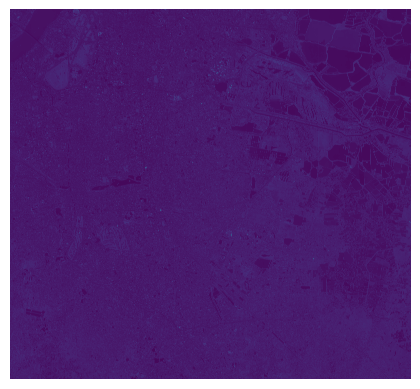

In [31]:
plt.imshow(output)
plt.axis('off')

/Users/abhimanyubhowmik/opt/anaconda3/envs/autoXai/lib/python3.9/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(-0.5, 4839.5, 4399.5, -0.5)

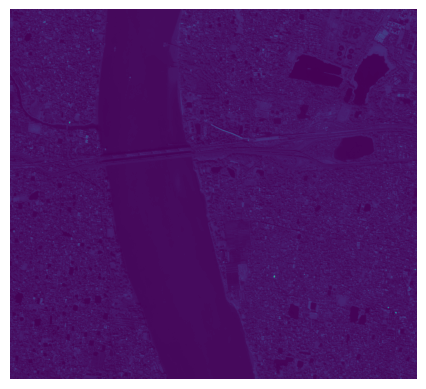

In [5]:
outfile = rasterio.open('SR_IMG_border_with_overlap.tif')
outfile = outfile.read()
outfile = outfile.reshape(outfile.shape[1],outfile.shape[2])
plt.imshow(outfile)
plt.axis('off')

In [15]:
output

array(<open DatasetReader name='Output.tif' mode='r'>, dtype=object)

In [38]:
out_ds = driver.Create('outfile.tif', xsize =  output.shape[1],ysize = output.shape[0], bands = 1, eType = gdal.GDT_Float32)
out_ds.SetGeoTransform(gt1)
out_ds.SetProjection(proj1)
outband = out_ds.GetRasterBand(1)
outband.WriteArray(output)
out_ds.FlushCache()

In [44]:
out_ds.GetDriver

<bound method Dataset.GetDriver of <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x176d86a80> >>

In [6]:
from osgeo import gdal,osr
import numpy as np

def save_raster(path, band_count, bands, srs, gt, format='GTiff', dtype = gdal.GDT_Float32):
    rows,cols = bands.shape
    # Initialize driver & create file
    driver = gdal.GetDriverByName(format)
    dataset_out = driver.Create(path, cols, rows, 1, dtype)
    dataset_out.SetGeoTransform(gt)
    dataset_out.SetProjection(srs)
    # Write file to disk
    dataset_out.GetRasterBand(1).WriteArray(bands)
    dataset_out = None

In [5]:
x_origin = gt1[0]
y_origin = gt1[3]
x_px = gt1[1]
y_px = gt1[5]
x_rot = gt1[2]
y_rot = gt1[4]

gt = x_origin,x_px/4,x_rot,y_origin,y_rot,y_px/4

In [10]:
gt

(638003.64, 0.7, 0.0, 2506944.48, 0.0, -0.7)

In [11]:
gt1

(638003.64, 2.8, 0.0, 2506944.48, 0.0, -2.8)

In [9]:
save_raster('SR_IMG_4x_geo.tif',1,outfile,proj1,gt1)

In [12]:
if not os.path.isdir('patches/'):
    os.mkdir('patches/')
    
if not os.path.isdir('patches/lr_image/'):
    os.mkdir('patches/lr_image/')
    
# for img in range(full_img_1.shape[0]):

def log_transformed(img):
    c = 255/(np.log(1 + np.max(img)))
    log_transformed = c * np.log(1 + img)

    # Specify the data type.
    log_transformed = np.array(log_transformed, dtype = np.uint8)
    return log_transformed

large_image = new_img1

patches_img = patchify(large_image, (128, 128), step=128) 
x_origin = gt1[0]
y_origin = gt1[3]
x_px = gt1[1]
y_px = gt1[5]
x_rot = gt1[2]
y_rot = gt1[4]
for i in range(patches_img.shape[0]):
    for j in range(patches_img.shape[1]):
        x_cord = x_origin + x_px*j*64
        y_cord = y_origin + y_px*i*64
        single_patch_img = patches_img[i,j,:,:]
        img_name = 'patches/lr_image/' + 'image_' + '0' + '_' + str(i)+str(j)+ '.tif'
        outds = driver.Create(img_name, xsize = single_patch_img.shape[1],
                  ysize = single_patch_img.shape[0], bands = 1, 
                  eType = gdal.GDT_Int16)
        gt = (x_cord,x_px,x_rot,y_cord,y_rot,y_px)
        outds.SetGeoTransform(gt)
        outds.SetProjection(proj1)
        outband = outds.GetRasterBand(1)
        outband.WriteArray(log_transformed(single_patch_img))
        print(single_patch_img.shape)
        outband.FlushCache()

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)

In [ ]:
if not os.path.isdir('patches/hr_image/'):
    os.mkdir('patches/hr_image/')

# for img in range(full_img_2.shape[0]):
x_origin = gt2[0]
y_origin = gt2[3]
x_px = gt2[1]
y_px = gt2[5]
x_rot = gt2[2]
y_rot = gt2[4]

large_image = new_img2

patches_img = patchify(large_image, (256, 256), step=256)

for i in range(patches_img.shape[0]):
    for j in range(patches_img.shape[1]):
        x_cord = x_origin + x_px*j*256
        y_cord = y_origin + y_px*i*256
        single_patch_img = patches_img[i,j,:,:]
        img_name = 'patches/hr_image/' + 'image_' + '0' + '_' + str(i)+str(j)+ '.tif'
        outds = driver.Create(img_name, xsize = single_patch_img.shape[1],
                  ysize = single_patch_img.shape[0], bands = 1, 
                  eType = gdal.GDT_Int16)
        gt = (x_cord,x_px,x_rot,y_cord,y_rot,y_px)
        outds.SetGeoTransform(gt)
        outds.SetProjection(proj2)
        outband = outds.GetRasterBand(1)
        outband.WriteArray(single_patch_img)
        outband.FlushCache()

### Testing LR and HR Image Segmentation

In [17]:
hr_dir = 'OriginalImages/'
lr_dir = 'LowResImages/'


if not os.path.isdir(hr_dir):
    os.mkdir(hr_dir)
else:
    shutil.rmtree(hr_dir)
    os.mkdir(hr_dir)
    
if not os.path.isdir(lr_dir):
    os.mkdir(lr_dir)
else:
    shutil.rmtree(lr_dir)
    os.mkdir(lr_dir)
    
lr_list = os.listdir('patches/lr_image/')
#hr_list = os.listdir('patches/hr_image/')
lr_list.sort()
#hr_list.sort()

lr_img_array_list = []
for lr_img in lr_list:
    # Open GeoRef
    #ds_hr = gdal.Open('/content/patches/hr_image/' + hr_img)
    ds_lr = gdal.Open('patches/lr_image/' + lr_img)
    # Open Images
    #hr_img_open = rasterio.open('/content/patches/hr_image/' + hr_img)
    lr_img_open =  rasterio.open('patches/lr_image/' + lr_img)
    #hr_img_array = hr_img_open.read()
    lr_img_array = lr_img_open.read()
    lr_img_array_total = cv2.normalize(lr_img_array, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    #hr_img_array_total = cv2.normalize(hr_img_array, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    lr_img_array_list.append(lr_img_array_total)
    
    # Writing of HR Image
    # gt_hr = ds_hr.GetGeoTransform()
    # proj_hr = ds_hr.GetProjection()
    # out_hr = driver.Create(hr_dir + hr_img, xsize = hr_img_array_total[0].shape[1],
    #           ysize = hr_img_array_total[0].shape[0], bands = 1, 
    #           eType = gdal.GDT_Byte)
    # out_hr.SetGeoTransform(gt_hr)
    # out_hr.SetProjection(proj_hr)
    # outband_hr = out_hr.GetRasterBand(1)
    # outband_hr.WriteArray(hr_img_array_total[0])
    # outband_hr.FlushCache()

    # Writing of HR Image
    gt_lr = ds_lr.GetGeoTransform()
    proj_lr = ds_lr.GetProjection()
    out_lr = driver.Create(lr_dir + lr_img, xsize = lr_img_array_total[0].shape[1],
              ysize = lr_img_array_total[0].shape[0], bands = 1, 
              eType = gdal.GDT_Byte)
    out_lr.SetGeoTransform(gt_lr)
    out_lr.SetProjection(proj_lr)
    outband_lr = out_lr.GetRasterBand(1)
    outband_lr.WriteArray(lr_img_array_total[0])
    out_lr.FlushCache()

In [19]:
if  os.path.isdir('results'):
    shutil.rmtree('results')
os.mkdir('results')
#images = hr_list[0:5]

# Geo Referenced Outputs

In [21]:
from keras.models import load_model
from numpy.random import randint
import tensorflow as tf

if not os.path.isdir('results/'):
    os.mkdir('results/')

generator = load_model('gen_e_15.h5', compile=False)

def rgb_to_gray(images):
    return  tf.image.rgb_to_grayscale(images).numpy()

results_new = 'results/'


i = 0
while i < (len(lr_img_array_list) - (len(lr_img_array_list)%10) + 1 ):
  print(i)
  sr = []
  if i != len(lr_img_array_list) - (len(lr_img_array_list)%10): 
    for src_image in lr_img_array_list[i:i+10]:
      gen_image = generator.predict(src_image)
      sr.append(gen_image)
    images = lr_list[i:i+10]
  else:
    for src_image in lr_img_array_list[i:]:
      gen_image = generator.predict(src_image)
      sr.append(gen_image)
    images = lr_list[i:]   

  for img,img_array in zip(images,sr):
      ds = gdal.Open('patches/lr_image/' + img)

      gt = ds.GetGeoTransform()
      proj = ds.GetProjection()

      x_origin = gt[0]
      y_origin = gt[3]
      x_px = gt[1]/4
      y_px = gt[5]/4
      x_rot = gt[2]
      y_rot = gt[4]
      # Output Geo-references
      out_ds = driver.Create(results_new + img, xsize = 256,
                ysize = 256, bands = 1, 
                eType = gdal.GDT_Byte)
      gt = (x_origin,x_px,x_rot,y_origin,y_rot,y_px)
      out_ds.SetGeoTransform(gt)
      out_ds.SetProjection(proj)
      outband_lr = out_ds.GetRasterBand(1)
      outband_lr.WriteArray(img_array[0,:,:,0])
      out_ds.FlushCache()
  i += 10 

0


2023-01-08 12:30:16.873009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 152ms/step
10
1/1 [==============================] - 0s 151ms/step
20
1/1 [==============================] - 0s 152ms/step
30
1/1 [==============================] - 0s 156ms/step
40
1/1 [==============================] - 0s 151ms/step
50
1/1 [==============================] - 0s 149ms/step
60
1/1 [==============================] - 0s 149ms/step
70
1/1 [==============================] - 0s 149ms/step
80
1/1 [==============================] - 0s 147ms/step
90
1/1 [==============================] - 0s 147ms/step
100
1/1 [==============================] - 0s 147ms/step
110
1/1 [==============================] - 0s 146ms/step
120
1/1 [==============================] - 0s 148ms/step
130
1/1 [==============================] - 0s 151ms/step
140
1/1 [==============================] - 0s 147ms/step
150
1/1 [==============================] - 0s 148ms/step
160
1/1 [==============================] - 0s 147ms/step
170
1/1 [==============================] - 0

In [ ]:
# Creating zip files
!zip -r /content/results/output /content/results